In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
!pip install -U scikit-learn


## embedding visualization 

### using PCA reduce the dimention directly

In [65]:
# Load the data

data = pd.read_excel('pages_data.xlsx', sheet_name="all-MiniLM-L6-v2_384")
input_data = pd.read_excel('pages_data.xlsx', sheet_name="Sheet3")


PC_embedding = data[['Title', 'embedding_c']]
Summary_embedding = data[['Title', 'embedding_s']]


/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from c

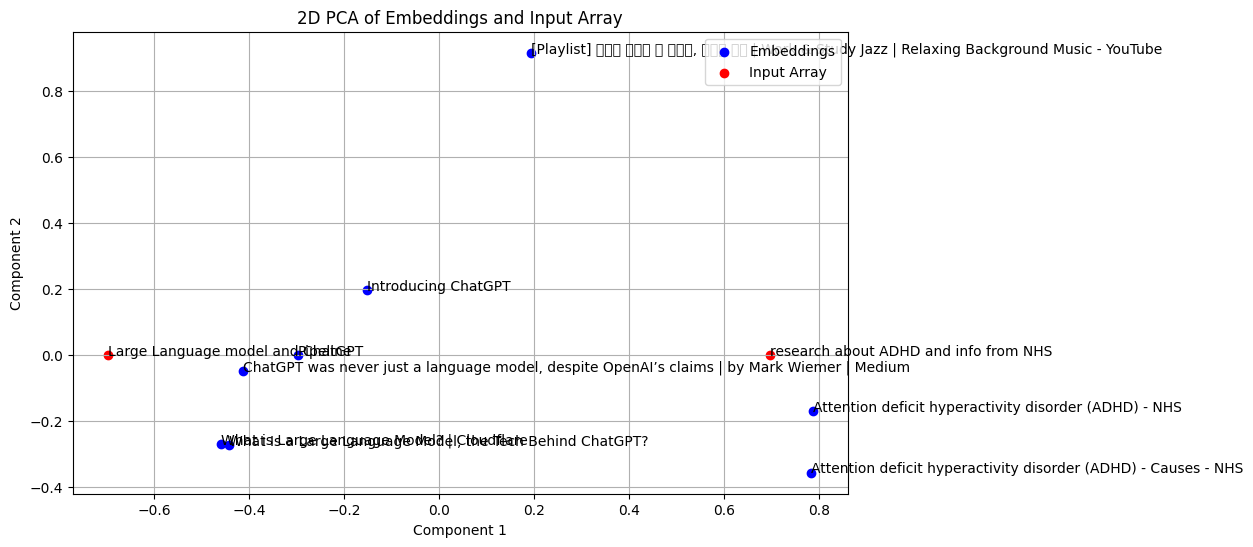

In [76]:
embeddings_array = PC_embedding['embedding_c'].values
PC_arrays = [np.array(eval(vector)) for vector in embeddings_array]
titles = PC_embedding['Title'].values

input = input_data['Embedding'].values
input_array = [np.array(eval(vector)) for vector in input]
task_topics = input_data['task topic'].values

# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(PC_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='b', label='Embeddings')

# Add titles as annotations for embeddings
for i, title in enumerate(titles):
    plt.annotate(title, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='r', label='Input Array')

# Add task topics as annotations for the input array
for i, topic in enumerate(task_topics):
    plt.annotate(topic, (reduced_input[i, 0], reduced_input[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Embeddings on page content and Input Array')
plt.legend()
plt.grid(True)
plt.show()

/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from c

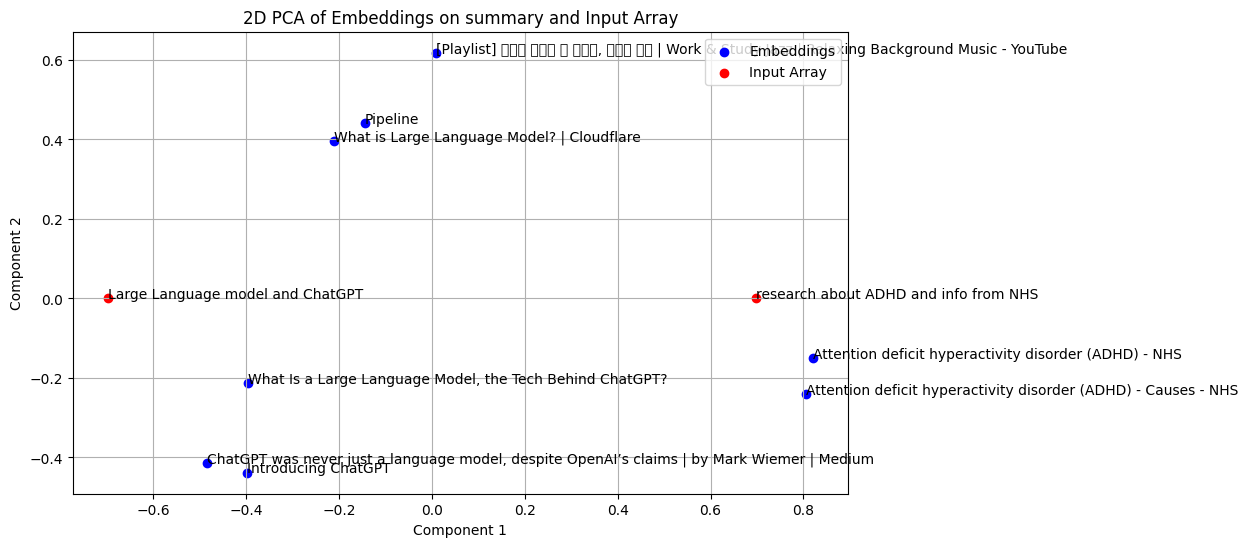

In [78]:
embeddings_s = Summary_embedding['embedding_s'].values
Summary_arrays= [np.array(eval(vector)) for vector in embeddings_s]

titles = PC_embedding['Title'].values


# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(Summary_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='b', label='Embeddings')

# Add titles as annotations for embeddings
for i, title in enumerate(titles):
    plt.annotate(title, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='r', label='Input Array')

# Add task topics as annotations for the input array
for i, topic in enumerate(task_topics):
    plt.annotate(topic, (reduced_input[i, 0], reduced_input[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Embeddings on summary and Input Array')
plt.legend()
plt.grid(True)
plt.show()



### calculate distance matrics first

In [ ]:
def create_dm(dataset):
    if type(dataset) == pd.core.frame.DataFrame:
        dataset = dataset.values
    lenData = len(dataset)

    distance_matrix = np.zeros(lenData * lenData).reshape(lenData, lenData)
    for i in range(lenData):
        for j in range(lenData):
            x1 = dataset[i].reshape(1, -1)
            x2 = dataset[j].reshape(1, -1)
            distance = matching_dissim(x1, x2)